## SOCIAL MEDIA CAMPAIGN PERFORMANCE TRACKER

In [ ]:
# Load and clean datset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Social_Media_Advertising.csv")

In [3]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

In [8]:
# check for null
df.isna().sum()

Campaign_ID         0
Target_Audience     0
Campaign_Goal       0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
Company             0
dtype: int64

In [11]:
# converting date and Acquisation_cost columns to the right data type

df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.info()

In [16]:
# to ensure all the entries have the same data type
df["Acquisition_Cost"] = df["Acquisition_Cost"].astype(str)
# removing the currency sign in Acquisation_cost column
df["Acquisition_Cost"] = df["Acquisition_Cost"].str.replace("$","", regex = False)
df["Acquisition_Cost"] = df["Acquisition_Cost"].str.replace(",","", regex = False)

# convert to float(decimal)
df["Acquisition_Cost($)"] = df["Acquisition_Cost"].astype(float)

In [17]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,Acquisition_Cost($)
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,500.0
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,500.0
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,500.0
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,500.0
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,500.0


In [ ]:
df.info()

In [24]:
# drop the other Acquisition_Cost column

df= df.drop(columns = "Acquisition_Cost")

In [25]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

In [70]:
# creating new columns
df['Hour'] = df['Date'].dt.hour
#df["DayOfWeek"] = df["Date"].dt.day_name()

In [38]:
# splitting the Target audience column into two columns
#capitalize the first letter
df["Target_Audience"] = df["Target_Audience"].str.title()
#splitting gender and age group
df[["Gender","Age group"]] = df["Target_Audience"].str.split(" ", expand=True)


In [42]:
print(df["Age group"].unique())


['35-44' '45-60' '25-34' 'Ages' '18-24']


In [44]:
#There is a string(ages)data entry in the Age group column
# assuming it means "aged", replacing it with 61-120
df["Age group"] = df["Age group"].replace(["Aged","Ages"],"61-120")

In [45]:
# Getting the age range midpoint
df[["Age start", "Age end"]] = df["Age group"].str.split("-",expand=True)
df["Age start"] = df["Age start"].astype(float)
df["Age end"] = df["Age end"].astype(float)
df["Age Midpoint"] = (df["Age start"] + df["Age end"])/2


In [46]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,ROI,Location,Language,Clicks,...,Company,Acquisition_Cost($),Timestamp,Hour,DayOfWeek,Gender,Age group,Age start,Age end,Age Midpoint
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,5.790000,Las Vegas,Spanish,500,...,Aura Align,500.0,2022-02-25,0,Friday,Men,35-44,35.0,44.0,39.5
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,7.210000,Los Angeles,French,500,...,Hearth Harmony,500.0,2022-05-12,0,Thursday,Women,45-60,45.0,60.0,52.5
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,0.430000,Austin,Spanish,500,...,Cyber Circuit,500.0,2022-06-19,0,Sunday,Men,45-60,45.0,60.0,52.5
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,0.909824,Miami,Spanish,293,...,Well Wish,500.0,2022-09-08,0,Thursday,Men,25-34,25.0,34.0,29.5
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,1.422828,Austin,French,293,...,Hearth Harmony,500.0,2022-08-24,0,Wednesday,Men,45-60,45.0,60.0,52.5


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Campaign_ID          300000 non-null  int64         
 1   Target_Audience      300000 non-null  object        
 2   Campaign_Goal        300000 non-null  object        
 3   Duration             300000 non-null  object        
 4   Channel_Used         300000 non-null  object        
 5   Conversion_Rate      300000 non-null  float64       
 6   ROI                  300000 non-null  float64       
 7   Location             300000 non-null  object        
 8   Language             300000 non-null  object        
 9   Clicks               300000 non-null  int64         
 10  Impressions          300000 non-null  int64         
 11  Engagement_Score     300000 non-null  int64         
 12  Customer_Segment     300000 non-null  object        
 13  Date          

In [48]:
df["Channel_Used"].unique()

array(['Instagram', 'Facebook', 'Pinterest', 'Twitter'], dtype=object)

In [49]:
# Calculating Click-through rate (%) column
df["CTR(%)"] = ((df["Clicks"]/df["Impressions"])*100).round(2)

In [50]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,ROI,Location,Language,Clicks,...,Acquisition_Cost($),Timestamp,Hour,DayOfWeek,Gender,Age group,Age start,Age end,Age Midpoint,CTR(%)
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,5.790000,Las Vegas,Spanish,500,...,500.0,2022-02-25,0,Friday,Men,35-44,35.0,44.0,39.5,16.67
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,7.210000,Los Angeles,French,500,...,500.0,2022-05-12,0,Thursday,Women,45-60,45.0,60.0,52.5,16.67
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,0.430000,Austin,Spanish,500,...,500.0,2022-06-19,0,Sunday,Men,45-60,45.0,60.0,52.5,16.67
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,0.909824,Miami,Spanish,293,...,500.0,2022-09-08,0,Thursday,Men,25-34,25.0,34.0,29.5,15.13
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,1.422828,Austin,French,293,...,500.0,2022-08-24,0,Wednesday,Men,45-60,45.0,60.0,52.5,15.13


### EXPLORATOTY DATA ANALYSIS (EDA)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. CTR by Age Group

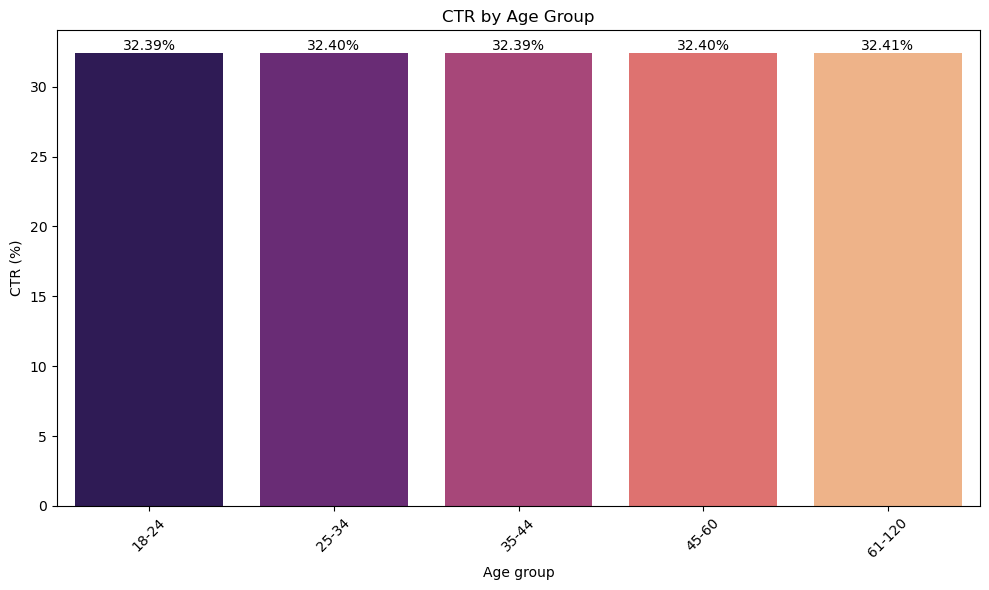

In [62]:
df_age_ctr = df.groupby("Age group").agg({"Clicks": "sum", "Impressions": "sum"}).reset_index()
df_age_ctr["CTR (%)"] =( df_age_ctr["Clicks"]/df_age_ctr["Impressions"])*100

plt.figure(figsize=(10,6))
ax=sns.barplot(x="Age group", y="CTR (%)",hue= "Age group", data=df_age_ctr, palette = "magma",legend=False)
# Add data labels above each bar
for i, row in df_age_ctr.iterrows():
    ax.text(i, row["CTR (%)"] + 0.005, f'{row["CTR (%)"]:.2f}%', 
            ha='center', va='bottom', fontsize=10)

plt.title("CTR by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. CTR by Platform

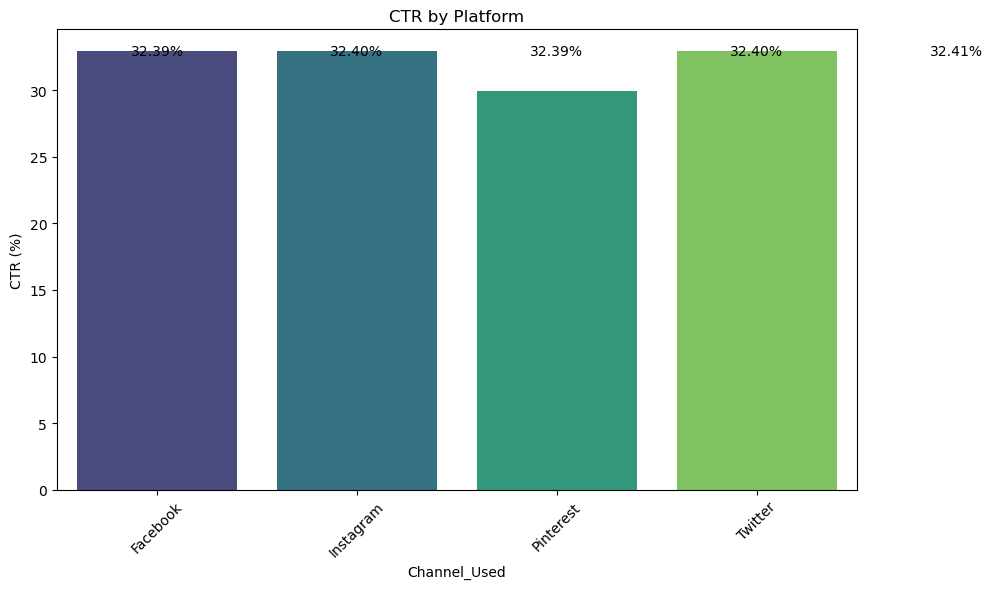

In [75]:
df_platform_ctr = df.groupby("Channel_Used").agg({"Clicks" : "sum", "Impressions": "sum"}).reset_index()
df_platform_ctr["CTR (%)"] = (df_platform_ctr["Clicks"] / df_platform_ctr["Impressions"]) * 100

plt.figure(figsize=(10,6))
ax=sns.barplot(x="Channel_Used", y="CTR (%)",hue= "Channel_Used", data=df_platform_ctr, palette = "viridis",legend=False)
# Add data labels above each bar
for i, row in df_age_ctr.iterrows():
    ax.text(i, row["CTR (%)"] + 0.005, f'{row["CTR (%)"]:.2f}%', 
            ha='center', va='bottom', fontsize=10)

plt.title("CTR by Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Correlation Heatmap

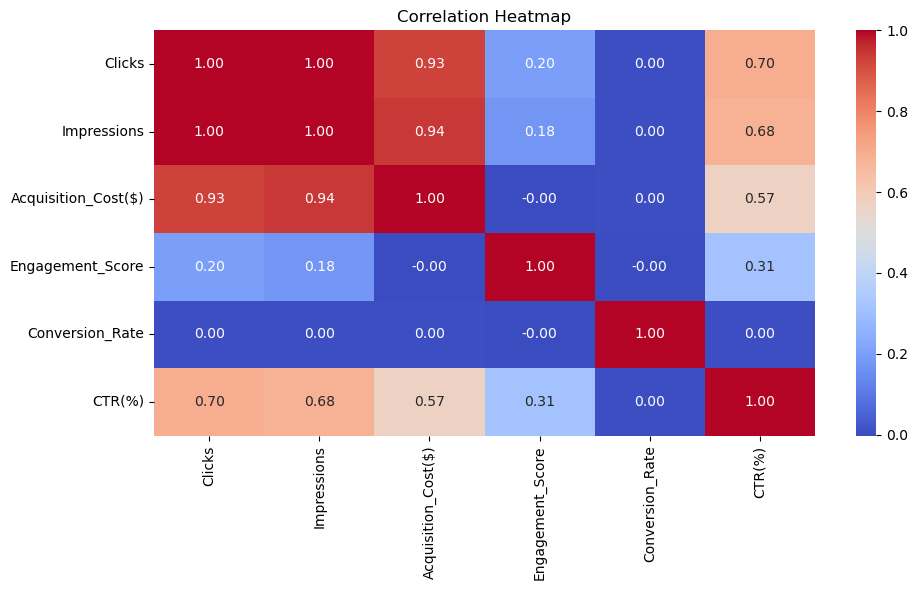

In [80]:
plt.figure(figsize=(10,6))
corr = df[["Clicks","Impressions","Acquisition_Cost($)","Engagement_Score","Conversion_Rate","CTR(%)"]].corr()
sns.heatmap(corr, annot=True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#### 4. Acquisition cost vs clicks

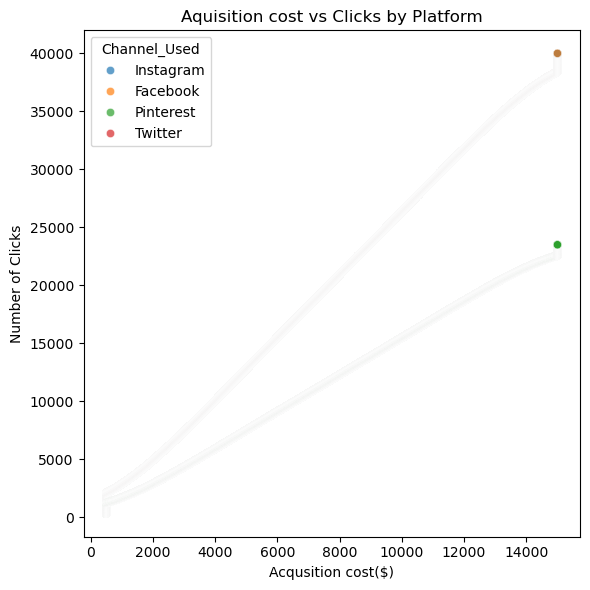

In [84]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="Acquisition_Cost($)", y="Clicks", hue="Channel_Used",alpha=0.7)
plt.title("Aquisition cost vs Clicks by Platform")
plt.xlabel("Acqusition cost($)")
plt.ylabel("Number of Clicks")
plt.tight_layout()
plt.show()

#### 4. Campaign Performance Over Time

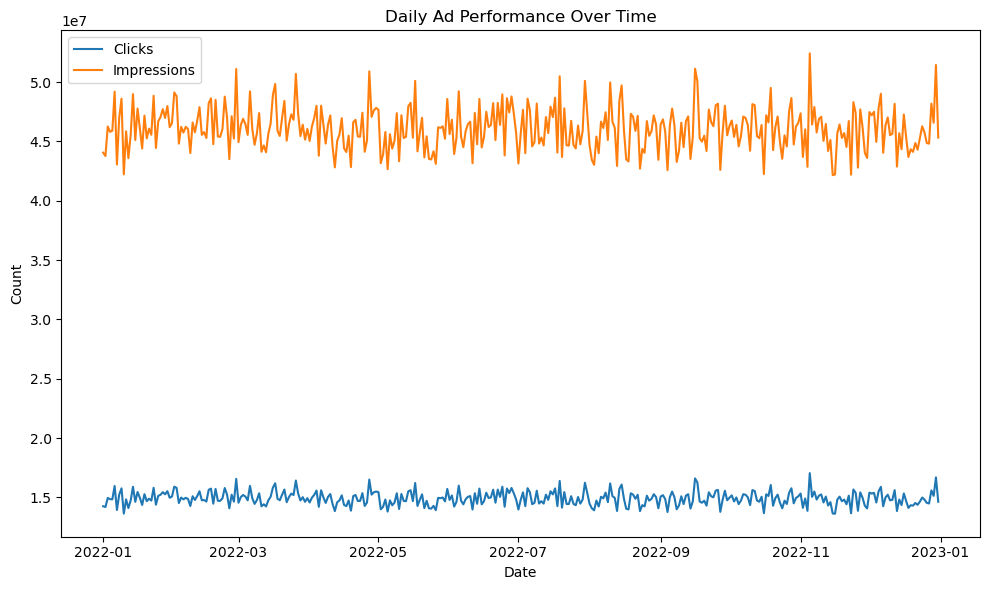

In [95]:

daily_summary = df.groupby("Date")[["Clicks", "Impressions"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=daily_summary, x="Date", y="Clicks", label="Clicks")
sns.lineplot(data=daily_summary, x="Date", y="Impressions", label="Impressions")
plt.title("Daily Ad Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


#### 5.Conversion Rate by Campaign Goal

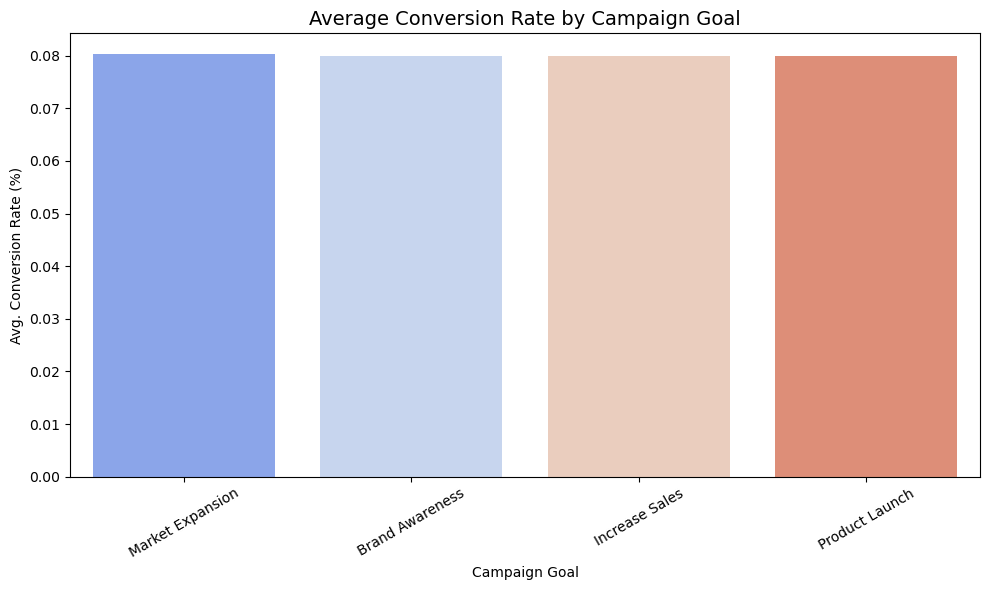

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate mean conversion rate
goal_cr = df.groupby('Campaign_Goal')['Conversion_Rate'].mean().reset_index()

# Sorting for better visuals
goal_cr = goal_cr.sort_values(by='Conversion_Rate', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=goal_cr, x='Campaign_Goal', y='Conversion_Rate',hue ='Campaign_Goal' , palette='coolwarm')


plt.title('Average Conversion Rate by Campaign Goal', fontsize=14)
plt.xlabel('Campaign Goal')
plt.ylabel('Avg. Conversion Rate (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [88]:
# adding more columns

# CTR: Click-through rate
df["CTR"] = df["Clicks"] / df["Impressions"]

# CPA: Cost per Acquisition
df["CPA"] = df["Acquisition_Cost($)"] / df["Clicks"].replace(0, 1)  # avoid divide-by-zero

# Age Range
df["Age_Range"] = df["Age end"] - df["Age start"]

# Weekend or Weekday
df["Is_Weekend"] = df["DayOfWeek"].isin(["Saturday", "Sunday"]).astype(int)


### Predictive Modeling (Python - Classification)

In [96]:
import numpy as np
from sklearn.model_selection 
import train_test_split from sklearn.ensemble 
import RandomForestRegressor from sklearn.metrics 
import mean_squared_error, r2_score from sklearn.preprocessing 
import OneHotEncoder


In [97]:
# Drop rows with missing values
df_model = df.dropna()

# Define target and features
target = "Conversion_Rate"

features = [
    'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company',
    'Clicks', 'Impressions', 'Engagement_Score', 'Acquisition_Cost($)', 
    'ROI', 'Hour', 'DayOfWeek', 'Gender', 'Age Midpoint', 'Campaign_Goal'
]

X = df_model[features]
y = df_model[target]


In [99]:
# Handling Categorical Features
# Separating numeric and categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# One-hot encode categorical variables
# NEW - compatible with scikit-learn >=1.2
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Combining with numeric data
X_encoded.index = X.index
X_full = pd.concat([X[numeric_cols], X_encoded], axis=1)


In [100]:
#  train-test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)


In [108]:
# Converting feature names to string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Training the model
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)  # or model.fit(X_sample, y_sample)


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Updated line
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.03540380666666667
RMSE: 0.0412070078182502
R²: -0.03486788423247611


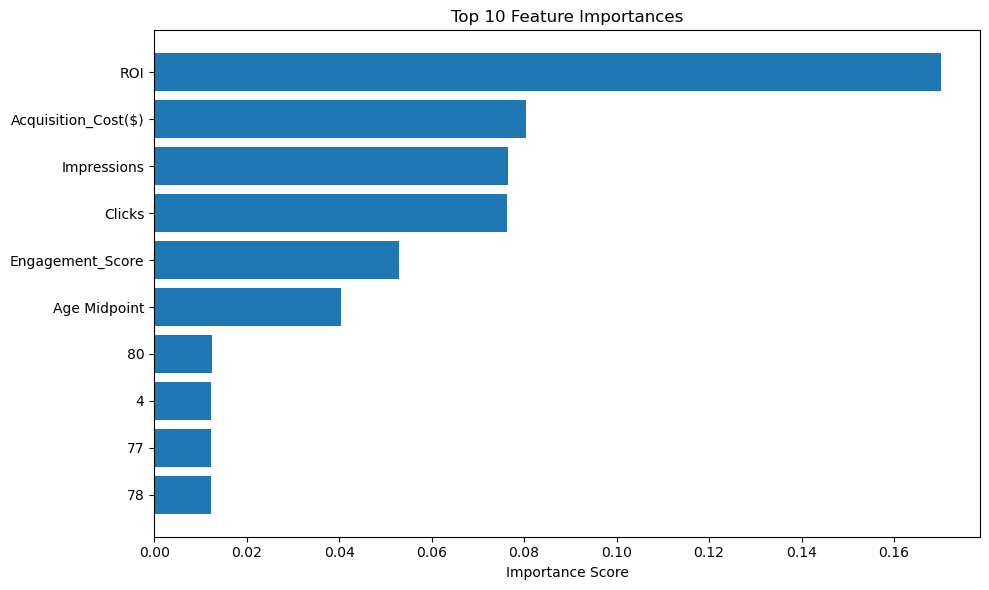

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

# Convert column names to strings (if they aren't already)
feature_names = [str(X_train.columns[i]) for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(feature_names, importances[indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [115]:
# exporting the clean data
df.to_csv("enhanced_social_media_campaign.csv", index=False)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Campaign_ID          300000 non-null  int64         
 1   Target_Audience      300000 non-null  object        
 2   Campaign_Goal        300000 non-null  object        
 3   Duration             300000 non-null  object        
 4   Channel_Used         300000 non-null  object        
 5   Conversion_Rate      300000 non-null  float64       
 6   ROI                  300000 non-null  float64       
 7   Location             300000 non-null  object        
 8   Language             300000 non-null  object        
 9   Clicks               300000 non-null  int64         
 10  Impressions          300000 non-null  int64         
 11  Engagement_Score     300000 non-null  int64         
 12  Customer_Segment     300000 non-null  object        
 13  Date          

In [118]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,ROI,Location,Language,Clicks,...,Age group,Age start,Age end,Age Midpoint,CTR(%),Time_of_Day,CTR,CPA,Age_Range,Is_Weekend
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,5.790000,Las Vegas,Spanish,500,...,35-44,35.0,44.0,39.5,16.67,Night,0.166667,1.000000,9.0,0
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,7.210000,Los Angeles,French,500,...,45-60,45.0,60.0,52.5,16.67,Night,0.166667,1.000000,15.0,0
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,0.430000,Austin,Spanish,500,...,45-60,45.0,60.0,52.5,16.67,Night,0.166667,1.000000,15.0,1
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,0.909824,Miami,Spanish,293,...,25-34,25.0,34.0,29.5,15.13,Night,0.151265,1.706485,9.0,0
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,1.422828,Austin,French,293,...,45-60,45.0,60.0,52.5,15.13,Night,0.151265,1.706485,15.0,0


In [121]:
df["Gender"]

0           Men
1         Women
2           Men
3           Men
4           Men
          ...  
299995      Men
299996    Women
299997    Women
299998    Women
299999      Men
Name: Gender, Length: 300000, dtype: object